# Compare the subhalo optical depth and the number of absorbers for different subhalo density profiles

In [1]:
%matplotlib inline
from IPython.display import HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
mpl.rcParams.update({'font.size': 15})

import sys
sys.path.append('../')

from hayashi.forest import Forest
from hayashi.utils import scinot
from hayashi.cosmo import Tk_ad

# Redshifts to evaluate the 21 cm forest
zvec = [10]

# Some host halo masses to plot several quantities
Ms = [1.e5, 1.e6, 1.e7]

# Colors and linestyles
colors = ["c","m","b"]
lines = ["-","--"]

forest_z_nfw = [Forest(z, Tk_ad(z), use_subhalos=1, sub_distr = "nfw") for z in zvec]

forest_z_uni = [Forest(z, Tk_ad(z), use_subhalos=1, sub_distr = "uni") for z in zvec]


/Users/omena/Downloads/ForestSubhalos/BOSC/Source/forest.py:89: RuntimeWarning: invalid value encountered in true_divide
  self.boost_factor_arr = np.where(self.tau_host_arr==0., 0., self.tau_sub_arr/self.tau_host_arr)


Optical depth subhalo contribution file for z=10, Tk=2.188e+00 K does not exist. Generating...


Generating optical depth subhalo contribution file: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:41<00:00,  1.21it/s]


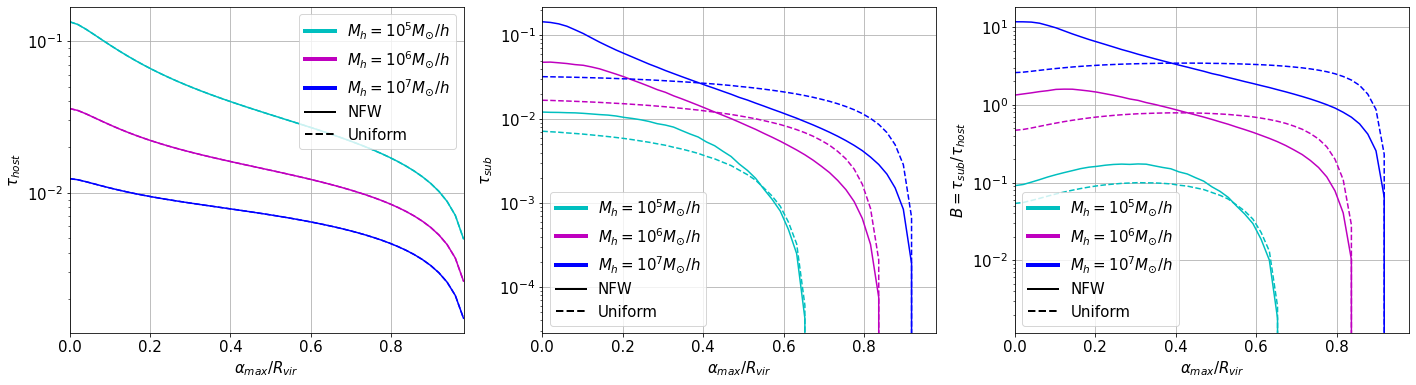

In [2]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))

for iz, z in enumerate(zvec):

    forest = forest_z_nfw[iz]
    
    alfas = forest.impparam[:-1]
    
    for iM, M in enumerate(Ms):
        
        ax1.plot( alfas, forest.tau_host_int(M, alfas), color=colors[iM], linestyle=lines[0] )
        ax2.plot( alfas, forest.tau_sub_int(M, alfas), color=colors[iM], linestyle=lines[0] )
        ax3.plot( alfas, forest.boost_factor_int(M, alfas), color=colors[iM], linestyle=lines[0] )
        
    forest = forest_z_uni[iz]
    
    alfas = forest.impparam[:-1]
    
    for iM, M in enumerate(Ms):
        
        ax1.plot( alfas, forest.tau_host_int(M, alfas), color=colors[iM], linestyle=lines[1] )
        ax2.plot( alfas, forest.tau_sub_int(M, alfas), color=colors[iM], linestyle=lines[1] )
        ax3.plot( alfas, forest.boost_factor_int(M, alfas), color=colors[iM], linestyle=lines[1] )

leg = []
for mm, M in enumerate(Ms):
    leg.append( Line2D([0], [0], color=colors[mm], linestyle="-", lw=4, label=r"$M_h=$"+scinot(M)+"$ M_{\odot}/h$") )

leg.append( Line2D([0], [0], color="k", linestyle=lines[0], lw=2, label="NFW" ) ) 
leg.append( Line2D([0], [0], color="k", linestyle=lines[1], lw=2, label="Uniform" ) ) 


ax1.set_xlim(forest.impparam[0],forest.impparam[-2])
ax2.set_xlim(forest.impparam[0],forest.impparam[-2])
ax3.set_xlim(forest.impparam[0],forest.impparam[-2])
ax1.set_yscale("log")
ax2.set_yscale("log")
ax3.set_yscale("log")
ax1.set_xlabel(r"$\alpha_{max}/R_{vir}$")
ax1.set_ylabel(r"$\tau_{host}$")
ax1.legend(handles=leg)
ax2.set_xlabel(r"$\alpha_{max}/R_{vir}$")
ax2.set_ylabel(r"$\tau_{sub}$")
ax2.legend(handles=leg)
ax3.set_xlabel(r"$\alpha_{max}/R_{vir}$")
ax3.set_ylabel(r"$B=\tau_{sub}/\tau_{host}$")
ax3.legend(handles=leg)
ax1.grid()
ax2.grid()
ax3.grid()
fig.savefig("Plots/optical_depth_subhalos_profiles.pdf", bbox_inches='tight')

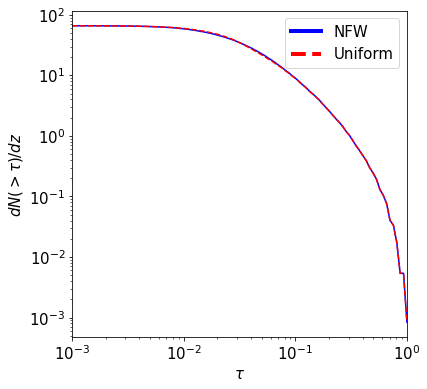

In [3]:
from scipy.ndimage import gaussian_filter1d

fig, (ax1) = plt.subplots(1,1,sharex=True,figsize=(6,6))

for iz, z in enumerate(zvec):

    forest = forest_z_nfw[iz]
    cumulvec_nfw, _ = forest.num_absorbers()

    forest = forest_z_uni[iz]
    cumulvec_uni, _ = forest.num_absorbers()

    ax1.plot( forest.tauvec, cumulvec_nfw, linestyle=lines[0], color="b" )
    ax1.plot( forest.tauvec, cumulvec_uni, linestyle=lines[1], color="r" )
    

leg = []
leg.append( mpl.lines.Line2D([0], [0], color="b", linestyle=lines[0], lw=4, label=r"NFW") )
leg.append( mpl.lines.Line2D([0], [0], color="r", linestyle=lines[1], lw=4, label=r"Uniform") )
#for iz, z in enumerate(zvec):
#    leg.append( mpl.lines.Line2D([0], [0], color="k", linestyle=lines[iz], lw=2, label="$z=$"+str(z) ) )    

ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.set_xlabel(r"$\tau$")
ax1.set_ylabel(r"$dN(>\tau)/dz$")


ax1.legend(handles=leg)

#ax1.set_ylim(1.e-4, 1.e2)
ax1.set_xlim(forest.tauvec[0], forest.tauvec[-1])
fig.savefig("Plots/cumul_distrs.pdf", bbox_inches='tight')